In [12]:
!pip install scikit-learn 

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 3.0 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.0 MB 3.2 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.0 MB 3.3 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.0 MB 3.2 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.0 MB 3.3 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.0 MB 3.3 MB/s eta 0:00:02
   ------------------- -------------------- 5.2/11.0 MB 3.3 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.0 MB 3.3 MB/s eta 0:00:02
   ------------------------ --------------- 6.8/11.0 MB 3.4 MB/s eta 0:00:02
   -------------------------- -----

In [1]:
import pandas as pd
from Extractor import FeatureExtractor
import warnings
warnings.filterwarnings("ignore")
from Utils import print_features
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
kind = 'hourly'
paths_clean = glob.glob(f"../data/{kind}/*.csv")
paths_level_shift = glob.glob(f'../modified/{kind}/level_shift/*.csv')
paths_noise = glob.glob(f'../modified/{kind}/noise/*.csv')
paths_variance_shift = glob.glob(f'../modified/{kind}/variance_shift/*.csv')
paths_both = glob.glob(f'../modified_l_v/{kind}/*.csv')
paths_plateau = glob.glob(f'../modified/{kind}/plateau/*.csv')
print(paths_both)
paths_clean.sort()
paths_level_shift.sort()
paths_noise.sort()
paths_variance_shift.sort()
paths_both.sort()

data_num = 25#5,5,3
print(paths_both[data_num])
data_clean = pd.read_csv(paths_clean[data_num],index_col=0, parse_dates=True)
data_noise = pd.read_csv(paths_noise[data_num],index_col=0, parse_dates=True)
data_level_shift = pd.read_csv(paths_level_shift[data_num],index_col=0, parse_dates=True)
data_variance_shift = pd.read_csv(paths_variance_shift[data_num],index_col=0, parse_dates=True)
data_both = pd.read_csv(paths_both[data_num],index_col=0, parse_dates=True)
data_plateau = pd.read_csv(paths_plateau[data_num],index_col=0, parse_dates=True)



['../modified_l_v/hourly\\H1.csv', '../modified_l_v/hourly\\H10.csv', '../modified_l_v/hourly\\H11.csv', '../modified_l_v/hourly\\H12.csv', '../modified_l_v/hourly\\H13.csv', '../modified_l_v/hourly\\H14.csv', '../modified_l_v/hourly\\H15.csv', '../modified_l_v/hourly\\H16.csv', '../modified_l_v/hourly\\H17.csv', '../modified_l_v/hourly\\H18.csv', '../modified_l_v/hourly\\H19.csv', '../modified_l_v/hourly\\H2.csv', '../modified_l_v/hourly\\H20.csv', '../modified_l_v/hourly\\H21.csv', '../modified_l_v/hourly\\H22.csv', '../modified_l_v/hourly\\H23.csv', '../modified_l_v/hourly\\H24.csv', '../modified_l_v/hourly\\H25.csv', '../modified_l_v/hourly\\H26.csv', '../modified_l_v/hourly\\H27.csv', '../modified_l_v/hourly\\H28.csv', '../modified_l_v/hourly\\H29.csv', '../modified_l_v/hourly\\H3.csv', '../modified_l_v/hourly\\H30.csv', '../modified_l_v/hourly\\H31.csv', '../modified_l_v/hourly\\H32.csv', '../modified_l_v/hourly\\H33.csv', '../modified_l_v/hourly\\H34.csv', '../modified_l_v/hourl

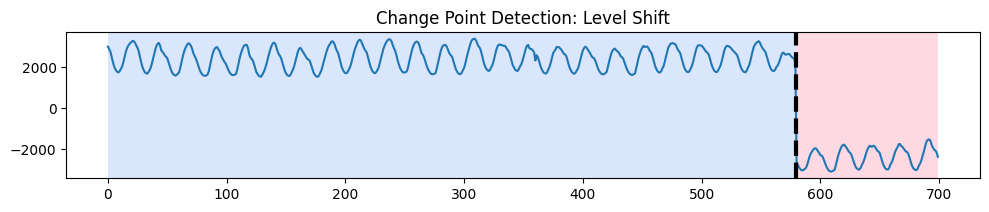

seasonality: {'period': 24, 'strength': np.float64(0.4114143827472875)}
level_shift: {'change_point': 580, 'scale': np.float64(-1.9932)}
trend: {'slope': np.float64(-1.3973549334406652), 'direction': 'Down', 'trend_type': 'First Order Trend'}
variance_shift: {'message': 'No Signifcant Variance Shift detected.'}
noise: {'strength': np.float64(0.0025), 'variance': np.float64(0.017339713888737975)}
plateau: {'message': 'No Plateaus Detected'}


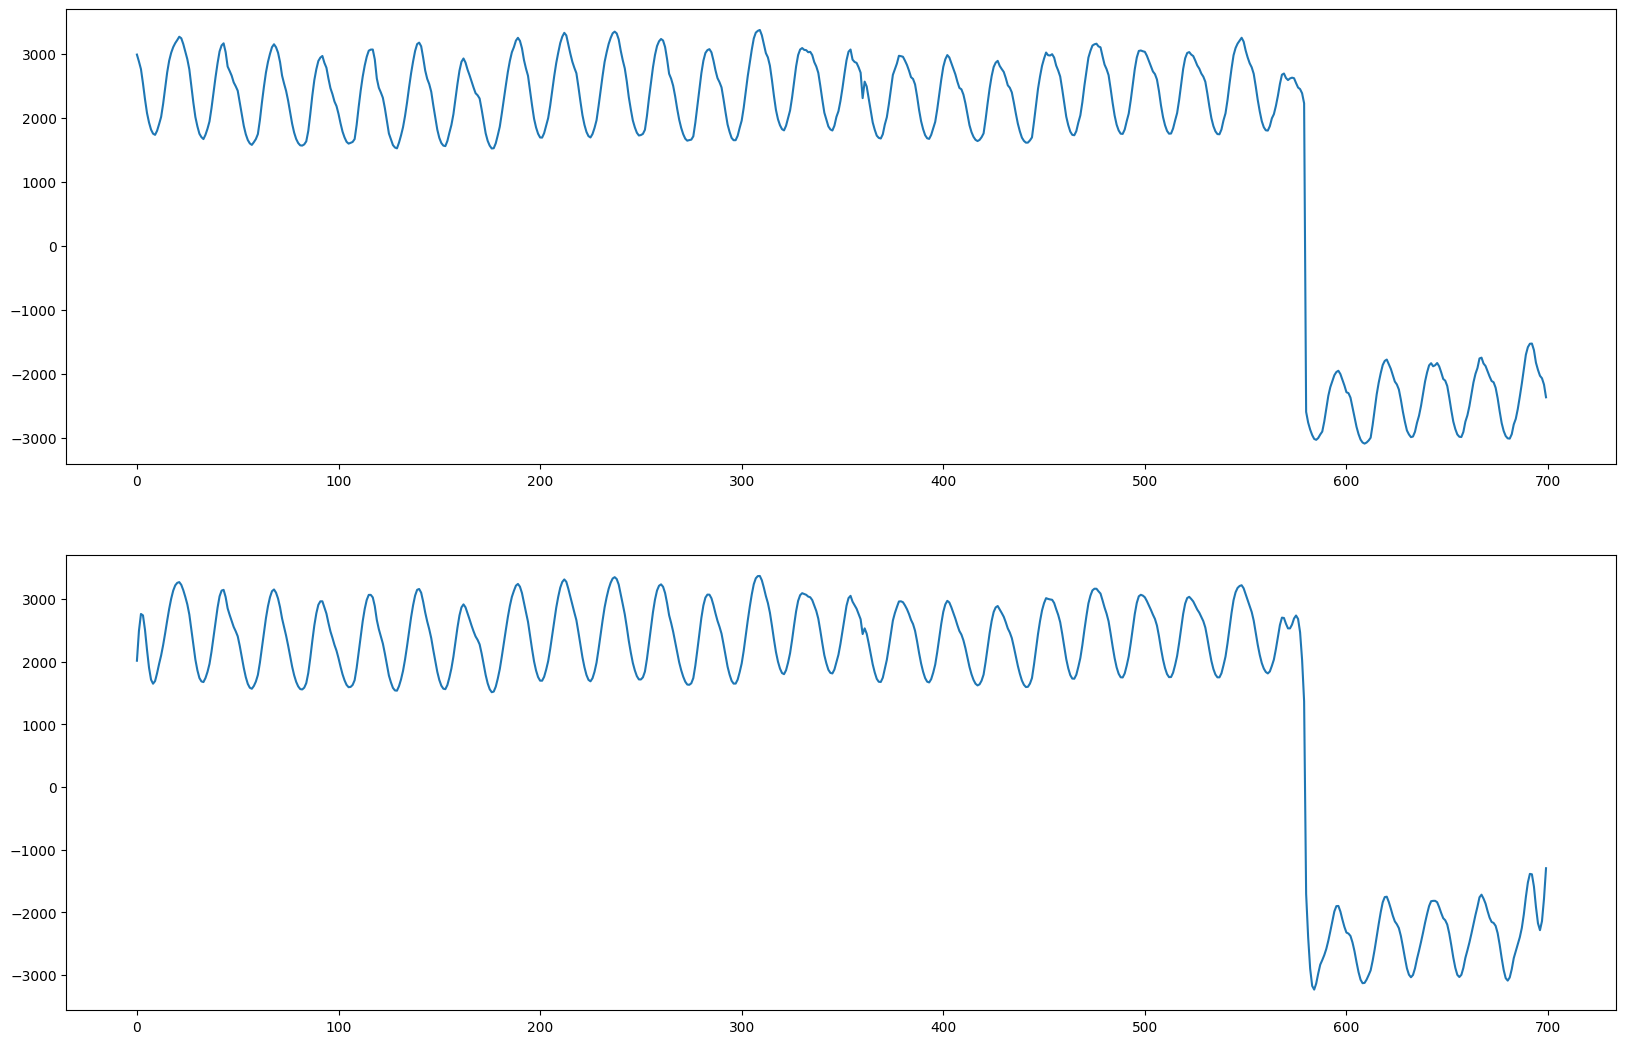

In [3]:
no_level_shift = 0
df = pd.read_csv(f"D:\Career\Eventum\modified\hourly\level_shift\H19.csv", index_col=0, parse_dates=True)
extractor = FeatureExtractor(df)
features = extractor.get_features(['all'])
print_features(features)


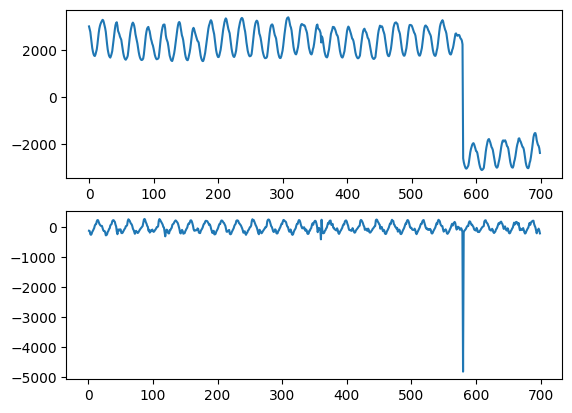

In [4]:
def rolling_average(data, window_size):
  """
  Calculates the rolling average of a data set.

  Args:
    data: The data set.
    window_size: The size of the window.

  Returns:
    The rolling average of the data set.
  """

  rolling_average = []
  for i in range(len(data)):
    if i < window_size - 1:
      rolling_average.append(None)
    else:
      sum_of_values = 0
      for j in range(i - window_size + 1, i + 1):
        sum_of_values += data[j]
      rolling_average.append(sum_of_values / window_size)

  return rolling_average


if __name__ == "__main__":
  window_size = 3

  rolling = rolling_average(df['value'].diff(), 1)
  rolling2 = rolling_average(df['value'], 1)
  
  plt.subplot(2,1,1)
  plt.plot(rolling2)
  
  plt.subplot(2,1,2)
  plt.plot(rolling)

In [35]:
meta = pd.read_csv('../modified/hourly/level_shift/meta.txt')
paths = glob.glob('../modified/hourly/level_shift/*.csv')
from Functions import Level_Shift
def test_level_shift(paths, meta, window_size=3, threshold=None):
    failed = []
    n_passed = 0

    for file_idx, path in enumerate(paths):
        
        # Load test data and metadata
        test_case = pd.read_csv(path ,index_col=0, parse_dates=True)
        metadata = meta.iloc[file_idx]
        
        # TODO: Run detection algorithm
        featureExtractor = FeatureExtractor(test_case)
        detection = Level_Shift.get_level_shift(df=test_case)
        
            
        # TODO: Check if detection matches metadata
        passed = detection['change_point'] in range(metadata['l_start_index']-7, metadata['l_start_index']+6) 
        if not passed:
            failed.append({
                'idx': file_idx,
                'file': path,
                'detection': detection,
                'metadata': metadata
            })

        if passed:
            n_passed += 1

        print(f"\rPassed {n_passed}/{file_idx+1} tests", end='')

    if len(failed) == 0:
        print(f"\r\033[32mPassed all {len(paths)} tests", end="\033[0m")
    
    print('\n')

    # TODO: Print failed tests
    if len(failed) > 0:
        print(f"Failed {len(failed)}/{len(paths)} tests:")
        for failure in failed:
            print(f"[{failure['idx']}] File: {failure['file']}, {len(failure['detection'])} detections")
            detection = failure['detection']
            metadata = failure['metadata']
            print(f"Detection: {detection['change_point']}:{detection['scale']}")
            print(f"Metadata: {metadata['l_start_index']}:{metadata['shift_scale']}")
            print('-'*50)
            print('='*50)

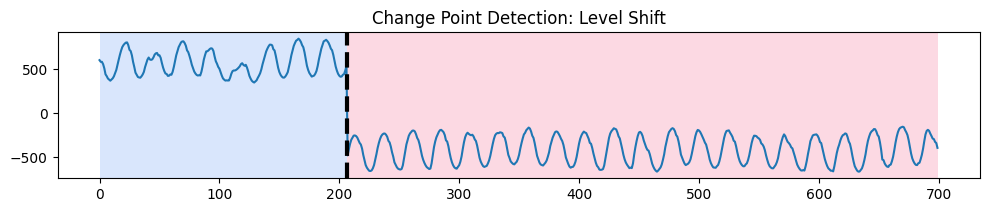

Passed 1/1 tests

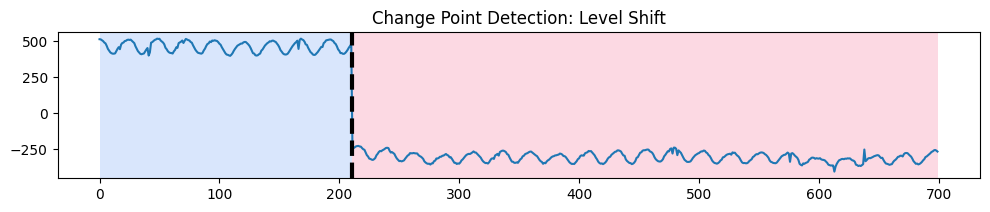

Passed 2/2 tests

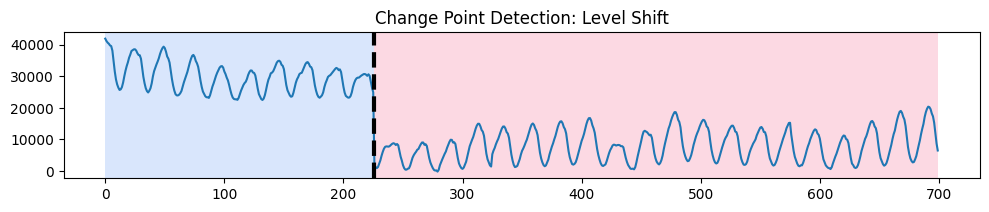

Passed 3/3 tests

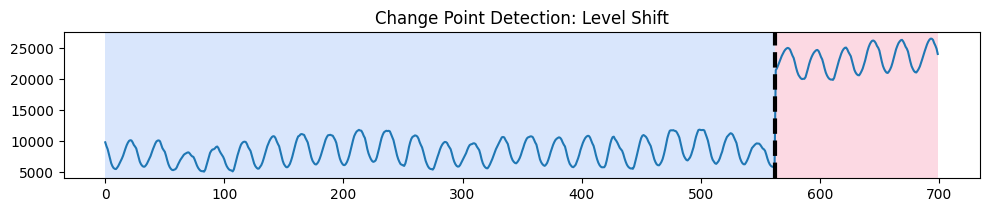

Passed 4/4 tests

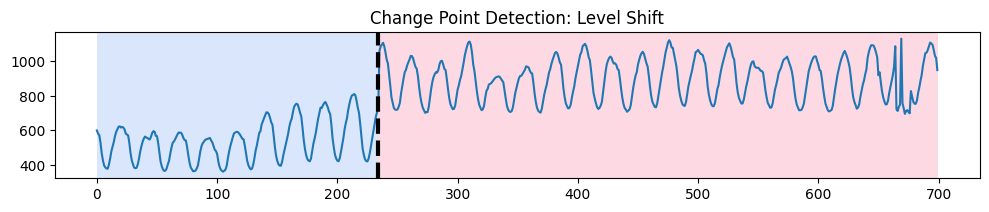

Passed 5/5 tests

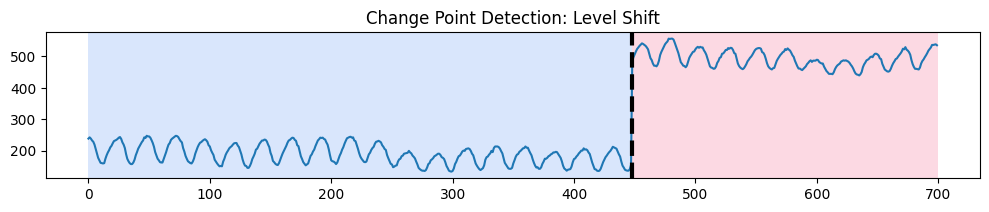

Passed 6/6 tests

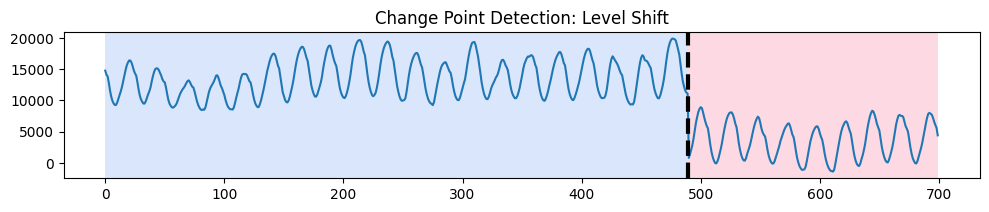

Passed 7/7 tests

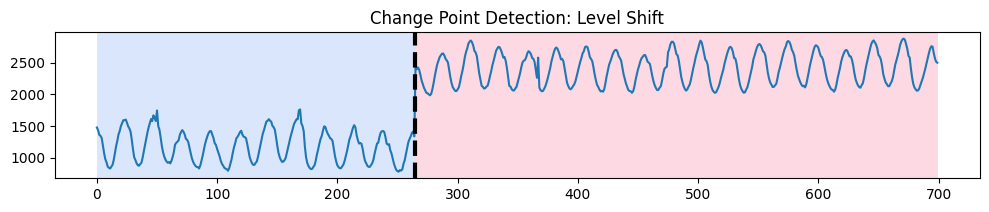

Passed 8/8 tests

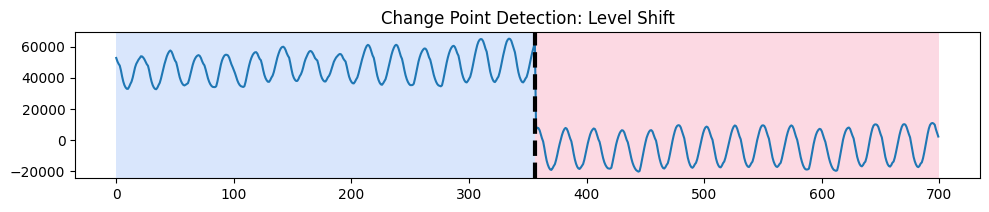

Passed 9/9 tests

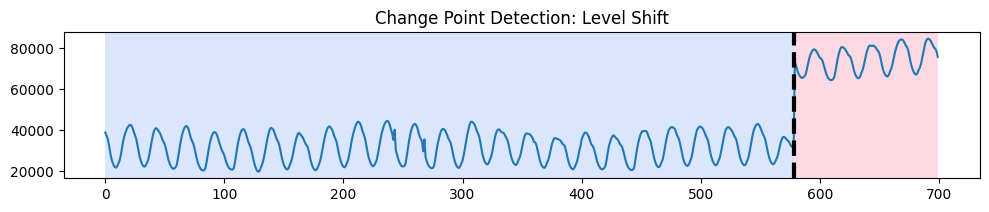

Passed 10/10 tests

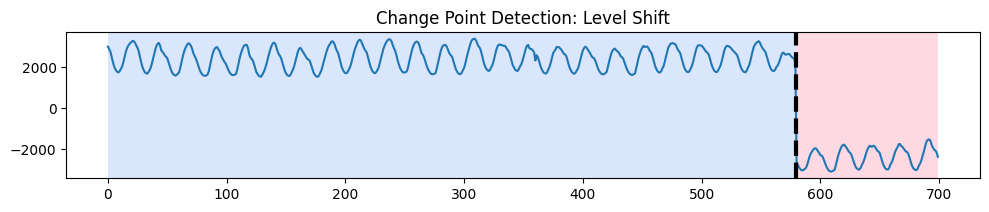

Passed 11/11 tests

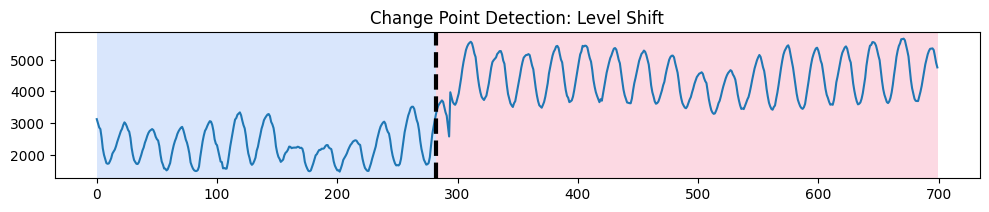

Passed 11/12 tests

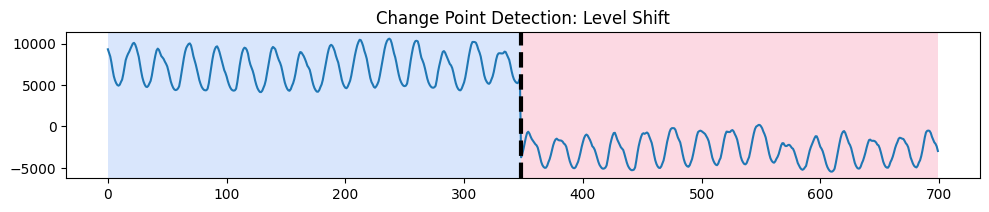

Passed 12/13 tests

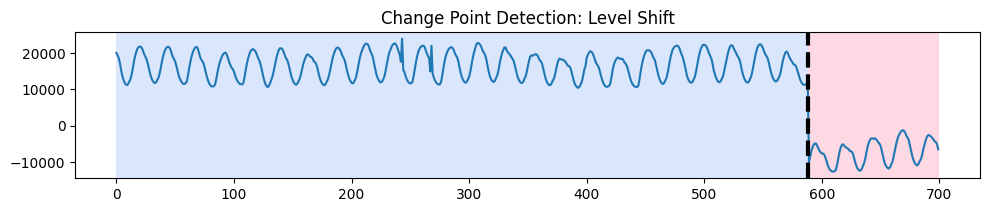

Passed 13/14 tests

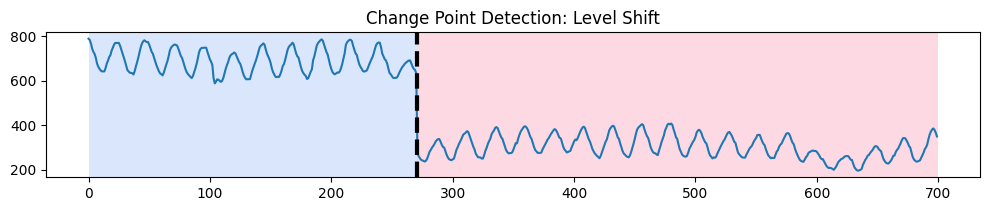

Passed 14/15 tests

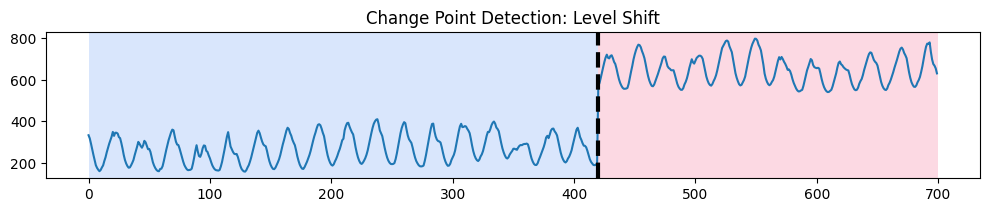

Passed 15/16 tests

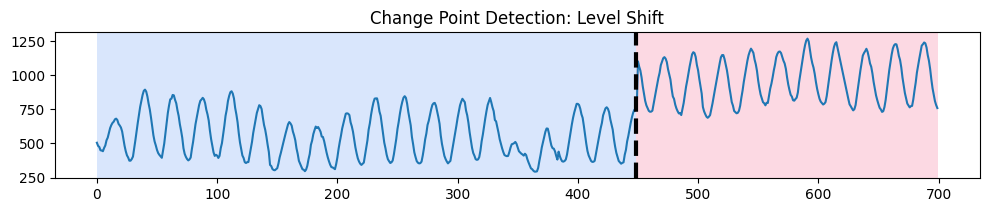

Passed 16/17 tests

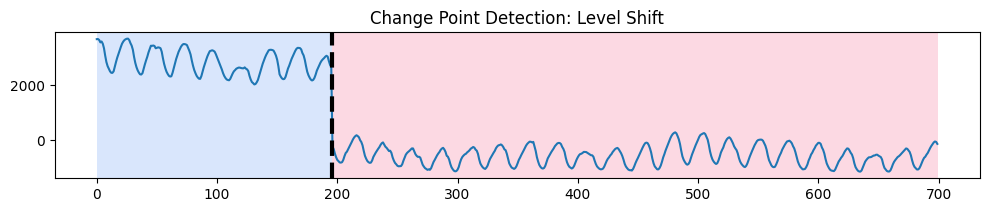

Passed 17/18 tests

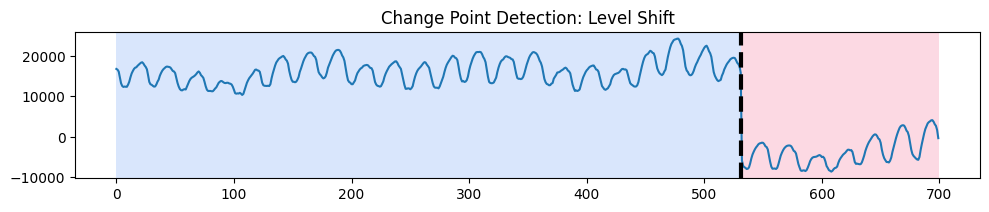

Passed 18/19 tests

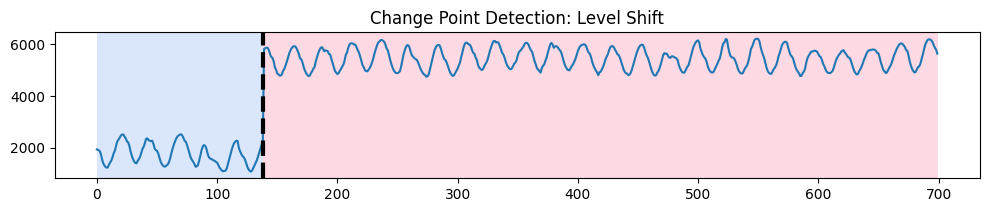

Passed 19/20 tests

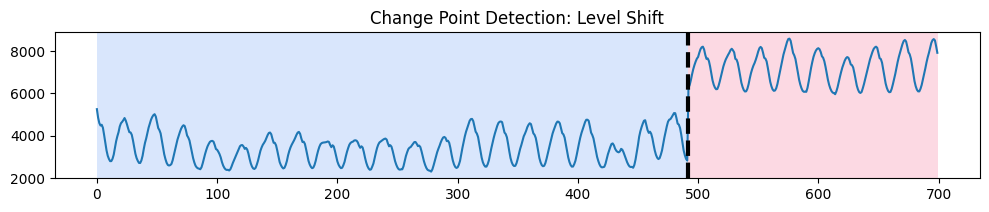

Passed 20/21 tests

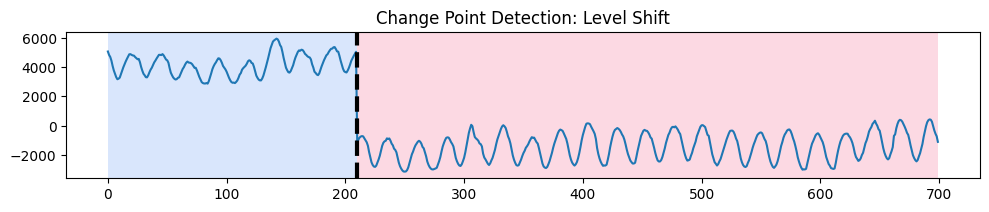

Passed 21/22 tests

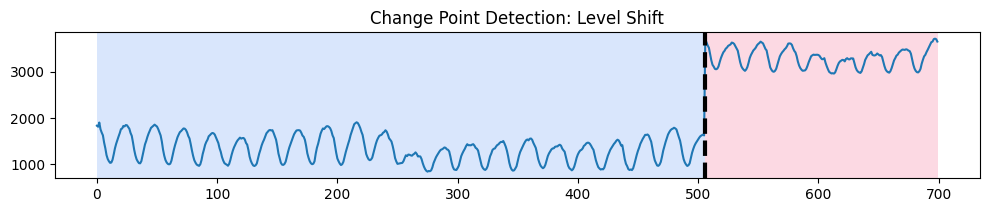

Passed 22/23 tests

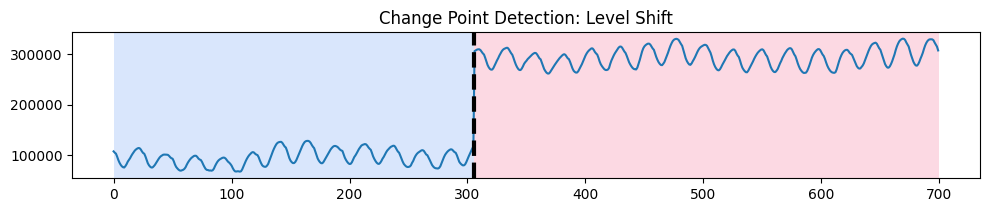

Passed 23/24 tests

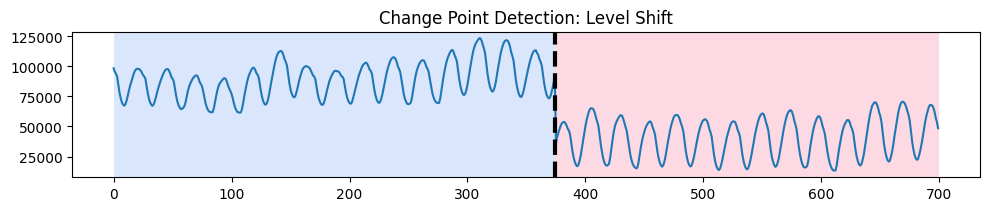

Passed 24/25 tests

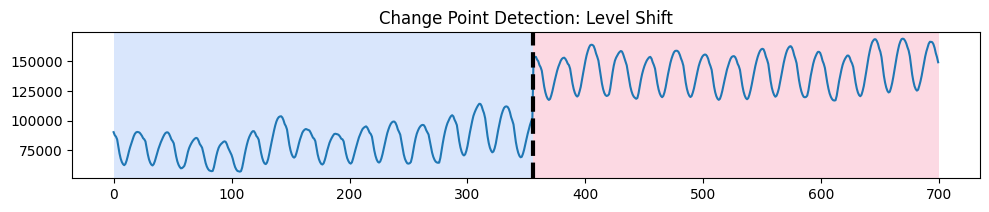

Passed 25/26 tests

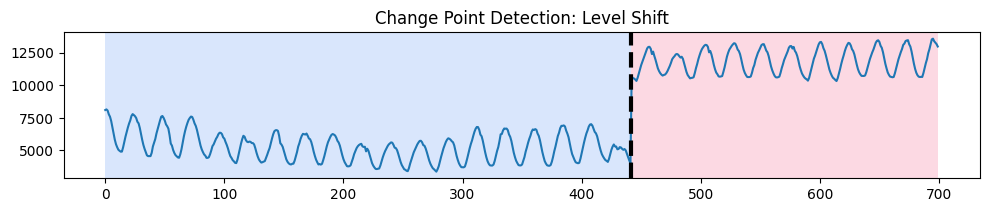

Passed 26/27 tests

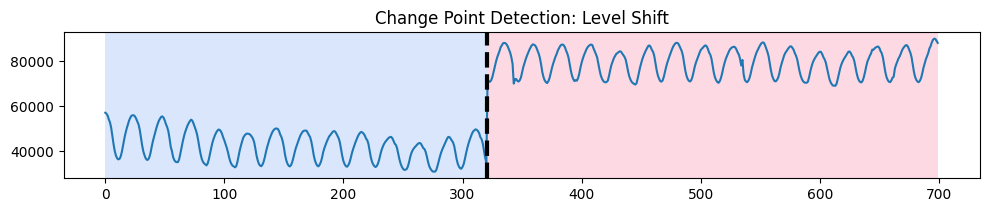

Passed 27/28 tests

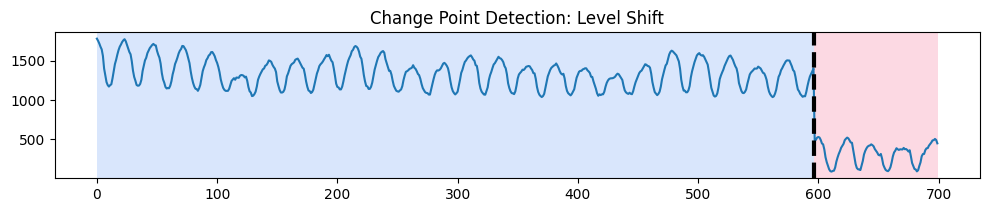

Passed 28/29 tests

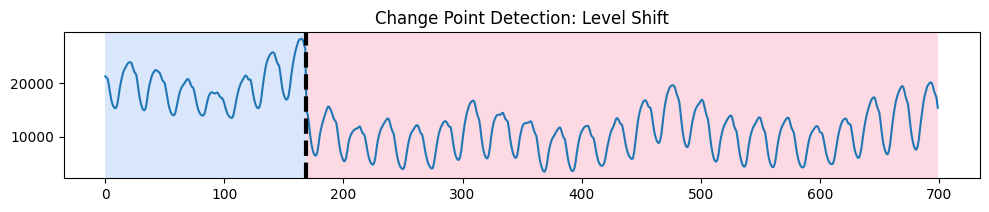

Passed 29/30 tests

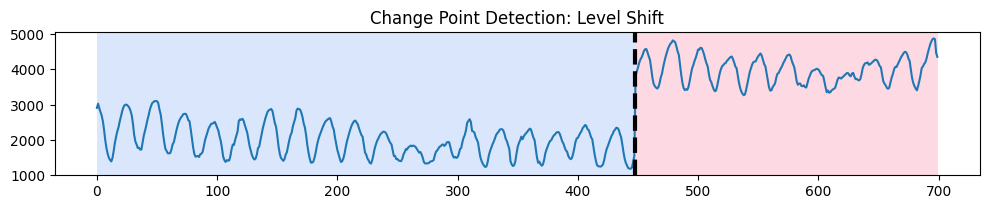

Passed 30/31 tests

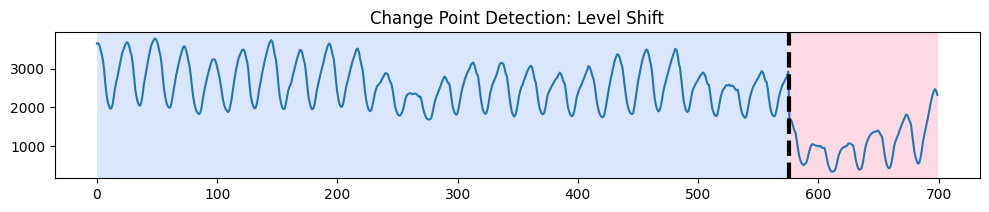

Passed 31/32 tests

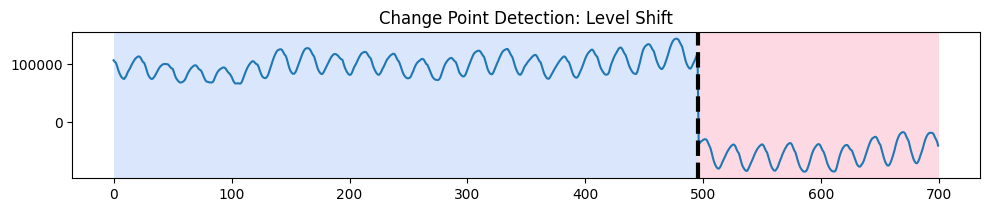

Passed 32/33 tests

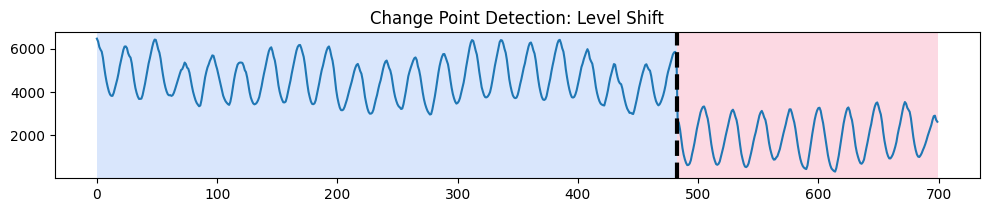

Passed 33/34 tests

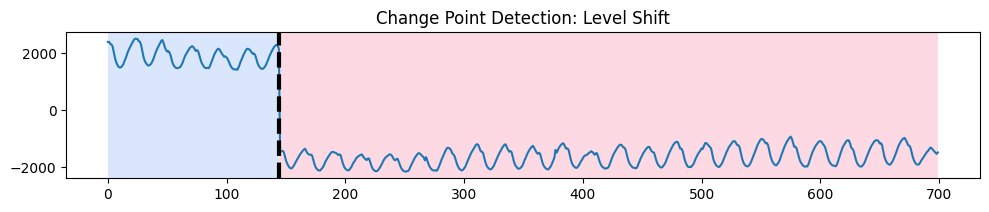

Passed 34/35 tests

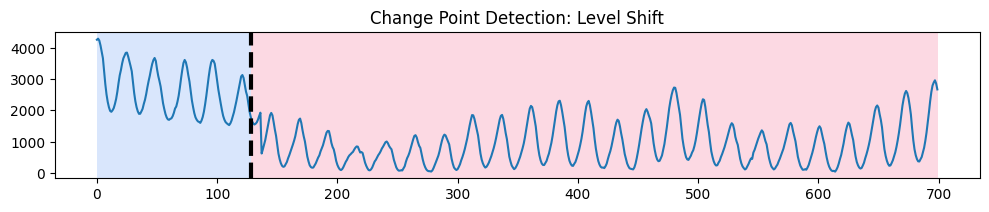

Passed 34/36 tests

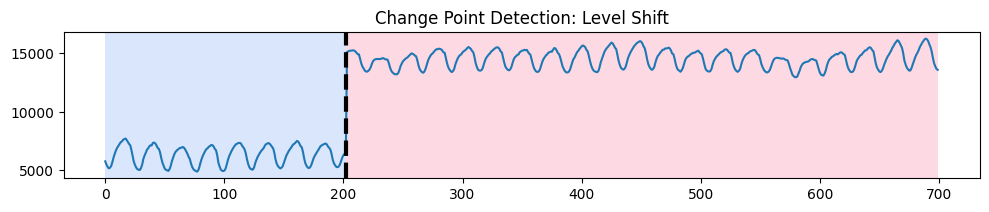

Passed 35/37 tests

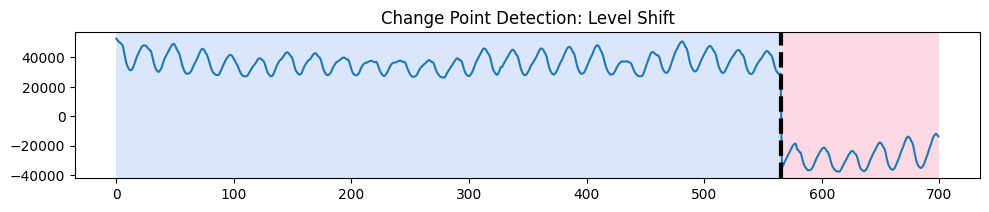

Passed 36/38 tests

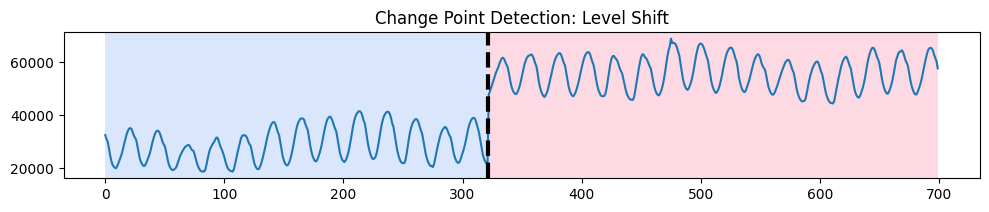

Passed 37/39 tests

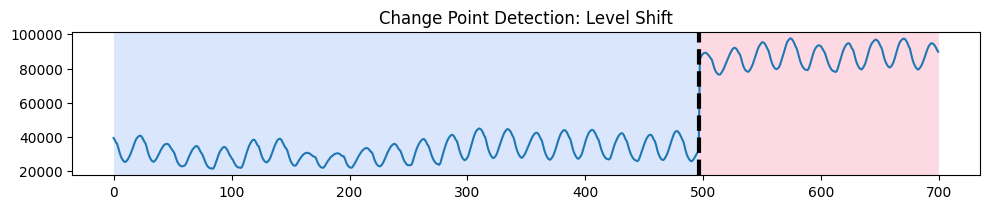

Passed 38/40 tests

Failed 2/40 tests:
[11] File: ../modified/hourly/level_shift/H2.csv, 2 detections
Detection: 283:0.9332
Metadata: 294:0.6359096517992312
--------------------------------------------------
[35] File: ../modified/hourly/level_shift/H5.csv, 2 detections
Detection: 129:-0.6493
Metadata: 137:-0.5953375254290354
--------------------------------------------------


In [29]:
test_level_shift(paths,meta)